In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/nadaalay/Heart-Disease-Classifier-Web-App/master/data.csv')
data['target'].replace(to_replace=1,value=0,inplace=True)
data['target'].replace(to_replace=2,value=1,inplace=True)
df=data.copy()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


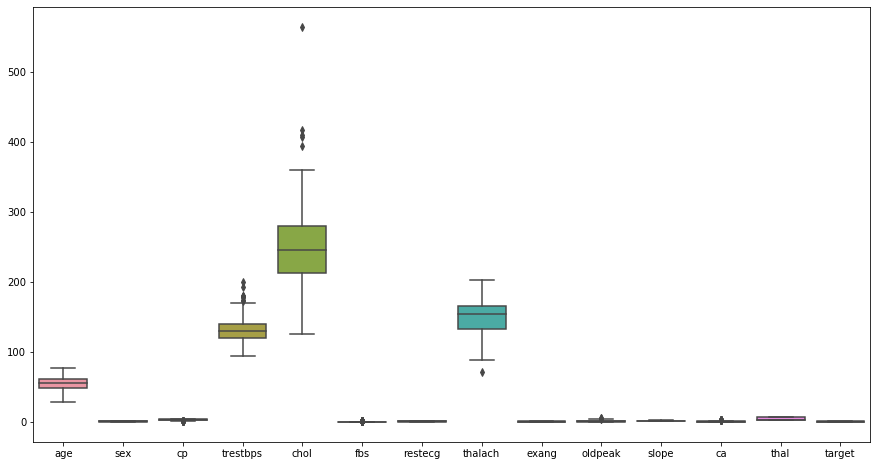

In [3]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
cp,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
trestbps,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
chol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
fbs,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
restecg,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
thalach,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
exang,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
oldpeak,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [8]:
q=df['chol'].quantile(0.98)
df_cleaned=df[df['chol']<q]

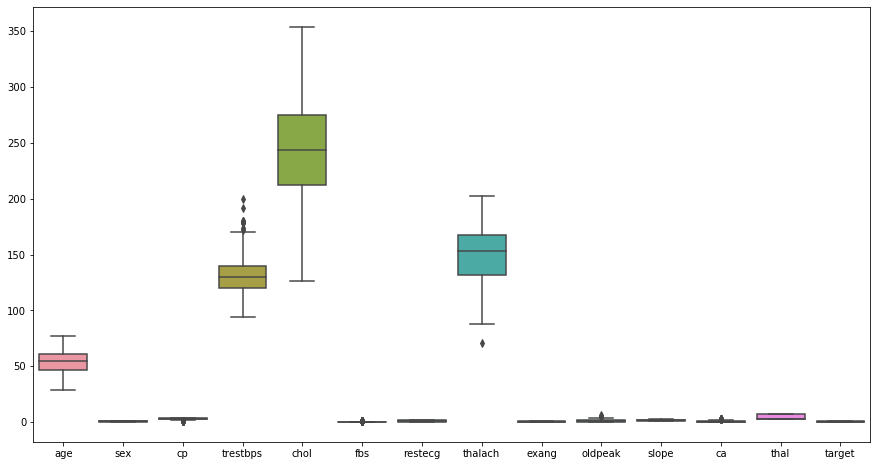

In [11]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_cleaned)

In [16]:
p=df_cleaned['trestbps'].quantile(0.97)
df_cleaned=df_cleaned[df_cleaned['trestbps']<p]

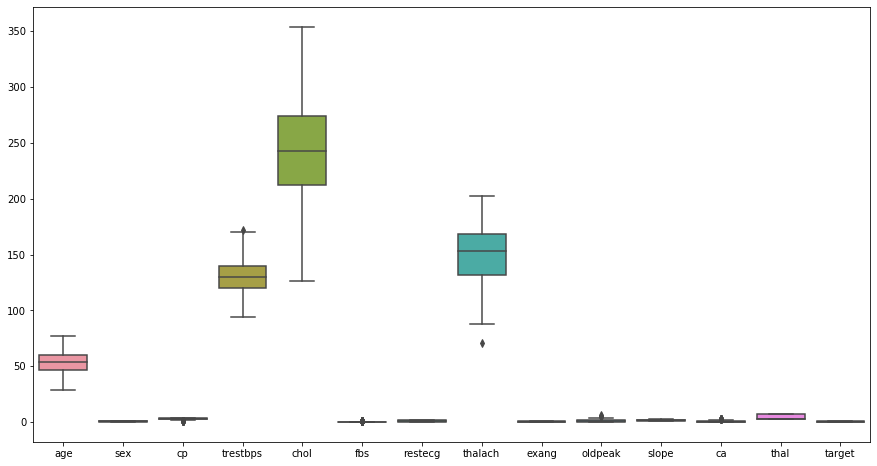

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_cleaned)

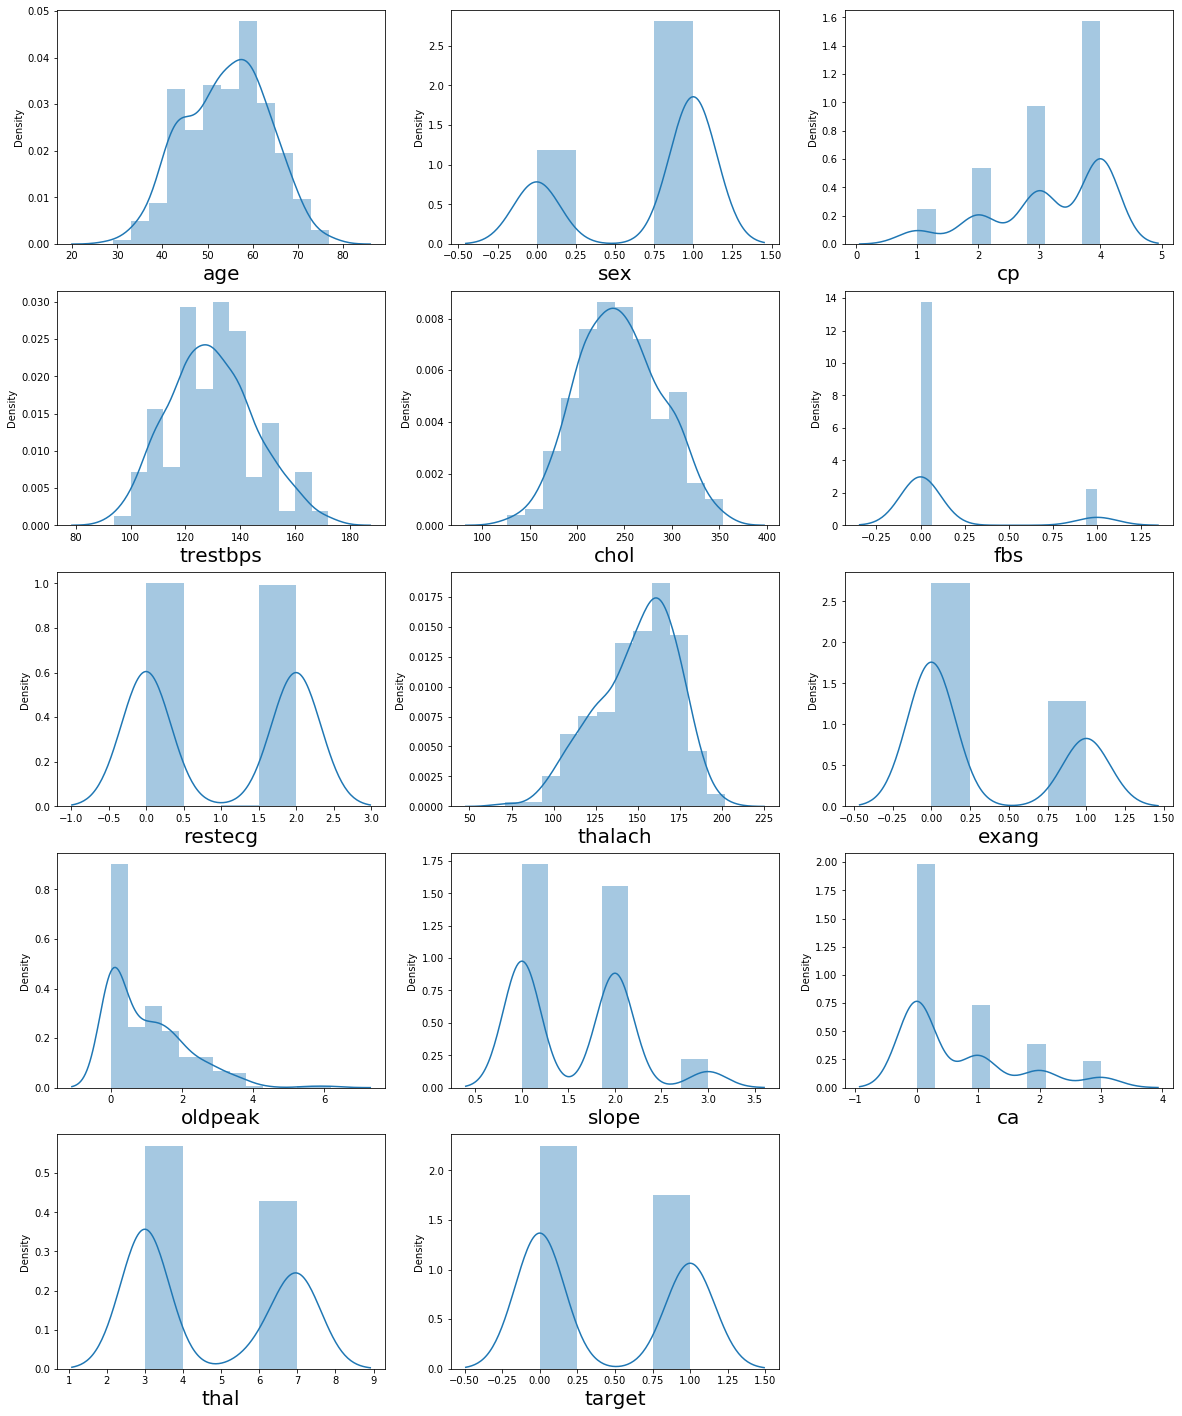

In [21]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for i in df_cleaned:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df_cleaned[i])
        plt.xlabel(i,fontsize=20)
        plotnumber+=1
plt.show()

In [106]:
Y=df_cleaned['target']
X=df_cleaned.drop(columns='target')

In [107]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [108]:
vif=pd.DataFrame()
vif['VIF']=[ variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features']=X.columns

vif

,VIF,Features
0,1.488685,age
1,1.285355,sex
2,1.290040,cp
3,1.163863,trestbps
4,1.105556,chol
5,1.070344,fbs
6,1.084096,restecg
7,1.674980,thalach
8,1.393060,exang
9,1.782029,oldpeak


In [109]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size= 0.25,random_state=42)

In [110]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [111]:
y_pred = knn.predict(x_test)

In [112]:
knn.score(x_train,y_train)

0.8697916666666666

In [113]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.875


In [114]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [2,3,5,7,9,10,11,12,14,13]
              }

In [115]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [116]:
y_train.shape

(192,)

In [117]:
x_train.shape

(192, 13)

In [118]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=2, score=0.718, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=2, score=0.795, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=2, score=0.895, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=2, score=0.711, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=2, score=0.763, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.769, total=   0.0s
[CV] algorit

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.846, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.868, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.763, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.789, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.821, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.846, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.842, total= 

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=12, score=0.872, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=12, score=0.868, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=12, score=0.737, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=12, score=0.842, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=14 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=14, score=0.821, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=14 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=14, score=0.872, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=14 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=14, score=0.868, 

[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=14, score=0.872, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=14 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=14, score=0.868, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=14 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=14, score=0.763, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=14 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=14, score=0.842, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.821, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.846, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.868, 

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=2, score=0.795, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=2, score=0.895, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=2, score=0.711, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=2, score=0.763, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, score=0.769, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, score=0.846, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, score=0.842, total= 

[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=5, score=0.795, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=5, score=0.846, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=5, score=0.842, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=5, score=0.711, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=5, score=0.816, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=7, score=0.821, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=7, score=0.846, total= 

[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.842, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.763, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.789, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.846, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.846, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.868, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.737, tot

[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=11, score=0.846, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=11, score=0.868, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=11, score=0.737, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=11, score=0.842, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=12, score=0.821, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=12, score=0.872, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=12, score=0.868, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=12, score=0.737, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=12, score=0.842, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=14 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=14, score=0.821, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=14 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=14, score=0.872, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=14 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=14, score=0.868, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=14 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=14, score=0.763, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=14 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=14, score=0.842, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=13, score=0.789, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=13, score=0.816, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=2, score=0.718, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=2, score=0.795, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=2, score=0.895, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=2, score=0.711, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=2, score=0.763, total=   0.0s
[CV] 

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=0.842, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=0.763, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=0.763, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.795, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.846, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.842, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.711, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=7, score=0.868, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=7, score=0.763, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=7, score=0.789, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=9, score=0.821, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=9, score=0.846, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=9, score=0.842, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=9, score=0.763, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=9, score=0.789, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=10, score=0.846, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=10, score=0.846, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=10, score=0.868, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=10, score=0.737, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=10, score=0.842, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=11, score=0.795, total=   0.0s
[

[CV]  algorithm=brute, leaf_size=18, n_neighbors=12, score=0.737, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=12, score=0.842, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=14 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=14, score=0.821, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=14 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=14, score=0.872, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=14 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=14, score=0.868, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=14 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=14, score=0.763, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=14 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=14, score=0.842, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=25, n_neighbors=2, score=0.895, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=2, score=0.711, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=2, score=0.763, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.769, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.846, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.842, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.763, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.842, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.711, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.816, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.821, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.846, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.868, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.763, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=30, n_neighbors=9, score=0.763, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=9, score=0.789, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.846, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.846, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.868, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.737, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.842, total=   0.0s
[CV] algorithm=b

[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.872, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.868, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.737, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.842, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=14 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=14, score=0.821, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=14 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=14, score=0.872, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=14 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=14, score=0.868, total=   0.0s
[CV] algorithm

[Parallel(n_jobs=1)]: Done 1050 out of 1050 | elapsed:   10.5s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [2, 3, 5, 7, 9, 10, 11, 12, 14, 13]},
             verbose=3)

In [119]:
# let's see the  best parameters according to gridsearch
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 14}

In [120]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =14)

In [121]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=14)

In [122]:
knn.score(x_train,y_train)

0.8489583333333334

In [123]:
knn.score(x_test,y_test)

0.859375

In [124]:
#k-fold cross validation 
kfold = KFold(n_splits=20,random_state= 42)
kfold.get_n_splits(X_scaled)

20

In [125]:
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =14)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(round(train_score_,3))
    test_score.append(round(test_score_,3))
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.8806584362139918 and test score is :   0.6153846153846154
for k =  2
train_score is :   0.8641975308641975 and test score is :   1.0
for k =  3
train_score is :   0.8600823045267489 and test score is :   0.7692307692307693
for k =  4
train_score is :   0.8559670781893004 and test score is :   0.8461538461538461
for k =  5
train_score is :   0.8559670781893004 and test score is :   0.9230769230769231
for k =  6
train_score is :   0.8641975308641975 and test score is :   0.8461538461538461
for k =  7
train_score is :   0.8724279835390947 and test score is :   0.8461538461538461
for k =  8
train_score is :   0.8641975308641975 and test score is :   0.6923076923076923
for k =  9
train_score is :   0.8600823045267489 and test score is :   0.9230769230769231
for k =  10
train_score is :   0.8559670781893004 and test score is :   0.8461538461538461
for k =  11
train_score is :   0.8559670781893004 and test score is :   0.9230769230769231
for k =  12
train_score

In [126]:
test_score

[0.615,
 1.0,
 0.769,
 0.846,
 0.923,
 0.846,
 0.846,
 0.692,
 0.923,
 0.846,
 0.923,
 0.846,
 0.846,
 0.769,
 0.846,
 0.846,
 0.917,
 0.833,
 0.917,
 0.75]

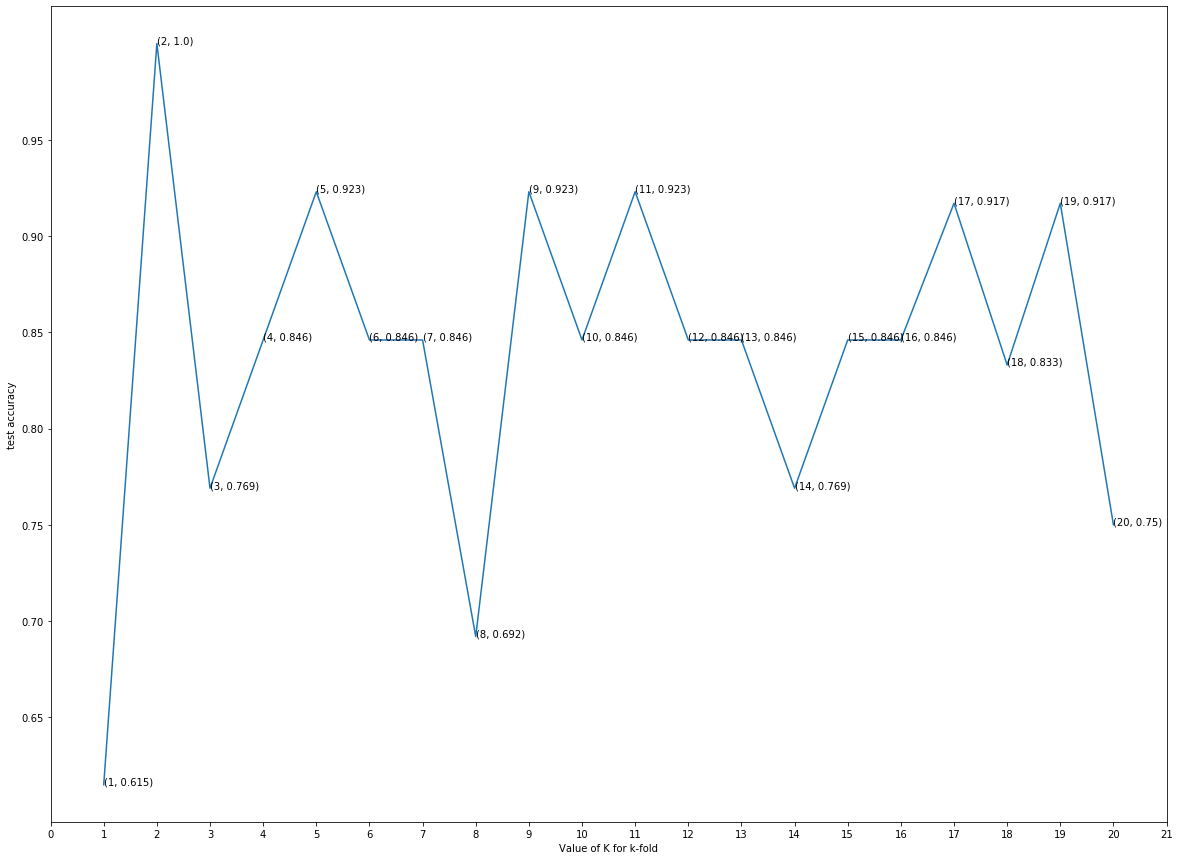

In [127]:
# let's plot the test_accuracy with the value of k in k-fold
plt.figure(figsize=(20,15))
plt.plot(count,test_score)
for i in range(1,21):
    plt.text(i, test_score[i-1],(i, test_score[i-1]))
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 22, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05))
plt.show()

In [161]:
knn.predict([[-0.11558427,  0.64978629,  0.87980213,  0.67368658, -0.95401383,
        2.47206616,  1.00588047,  0.23318695,  1.45669188,  1.88322437,
        2.35021344, -0.70816123,  1.21062554]])

array([1], dtype=int64)

In [160]:
X_scaled[15]

array([-0.11558427,  0.64978629,  0.87980213,  0.67368658, -0.95401383,
        2.47206616,  1.00588047,  0.23318695,  1.45669188,  1.88322437,
        2.35021344, -0.70816123,  1.21062554])

In [159]:
Y[15]

0

In [140]:
x_df=pd.DataFrame(X_scaled)

In [155]:
X_scaled[10]

array([-1.10190335,  0.64978629, -0.17267145,  0.67368658, -0.21983992,
       -0.40451992,  1.00588047,  1.30070946, -0.68648698, -0.91237395,
       -0.93751684, -0.70816123, -0.86241886])

In [142]:
y_df=pd.DataFrame(Y)

In [147]:
y_df.loc[255]

target    0
Name: 255, dtype: int64

In [ ]:
1.418690,0.649786,0.879802,1.961691,0.950250,-0.404520,1.005880,-1.773755,1.456692,0.440335,0.706348,2.491061,-0.862419